**Generate embeddings**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os

def save(model, parent, name):
  os.system(f'rm -r {parent}')
  os.system(f'mkdir {parent}')
  model.save(f'{parent}/{name}')

In [0]:
import pandas as pd

path = '/content/drive/My Drive/data/news/abcnews.csv'
data = pd.read_csv(path)

In [0]:
import re

sentences = []
for text in data['headline_text']:
  text = re.sub('[^A-Za-z0-9]+', ' ', text)
  text = text.split(' ')
  
  sentences.append(text)

In [0]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

phrase_model = Phrases(sentences)

phrases_text = Phraser(phrase_model)

phrases = list(phrases_text[sentences])

In [8]:
phrases

[['aba', 'decides_against', 'community', 'broadcasting', 'licence'],
 ['act', 'fire', 'witnesses', 'must_be', 'aware_of', 'defamation'],
 ['a_g', 'calls_for', 'infrastructure', 'protection', 'summit'],
 ['air_nz', 'staff', 'in', 'aust', 'strike', 'for', 'pay_rise'],
 ['air_nz', 'strike', 'to', 'affect', 'australian', 'travellers'],
 ['ambitious', 'olsson', 'wins', 'triple', 'jump'],
 ['antic', 'delighted_with', 'record_breaking', 'barca'],
 ['aussie', 'qualifier', 'stosur', 'wastes', 'four', 'memphis', 'match'],
 ['aust', 'addresses_un', 'security', 'council', 'over', 'iraq'],
 ['australia', 'is', 'locked', 'into', 'war', 'timetable', 'opp'],
 ['australia', 'to', 'contribute', '10_million', 'in', 'aid', 'to', 'iraq'],
 ['barca', 'take', 'record', 'as', 'robson', 'celebrates_birthday', 'in'],
 ['bathhouse', 'plans', 'move', 'ahead'],
 ['big', 'hopes', 'for', 'launceston', 'cycling', 'championship'],
 ['big', 'plan', 'to', 'boost', 'paroo', 'water_supplies'],
 ['blizzard', 'buries', 'uni

In [0]:
from gensim.models import Word2Vec

In [11]:
model = Word2Vec(phrases, min_count=3, size=100, workers=16, window=5, iter=30)

save(model, 'word2vec', 'word2vec.bin')

print(model)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Word2Vec(vocab=77889, size=100, alpha=0.025)


In [13]:
words = sorted(list(model.wv.vocab))
print(words)

['0', '000', '000_calls', '007', '01', '0105', '010615', '0107', '010715', '0108', '0109', '0110', '0111', '0112', '011214', '01_14', '02', '0201', '020215', '0204', '0205', '0206', '020615', '0207', '0208', '0209', '020914', '0210', '0212', '021214', '02_14', '02_15', '03', '0301', '0302', '0303', '0304', '0306', '0307', '030715', '0309', '0310', '0311', '031114', '0312', '03_14', '03_15', '04', '0402', '040215', '0403', '040515', '0406', '0407', '0408', '0409', '0410', '0411', '0412', '041214', '04_14', '05', '0501', '0502', '050215', '0503', '0505', '0506', '0507', '0508', '0509', '0511', '0512', '05_14', '05pc', '06', '0602', '060215', '0603', '0605', '0606', '0608', '0611', '061114', '0612', '06_14', '07', '0701', '0702', '0703', '0704', '0705', '0706', '070715', '0708', '0710', '0711', '071114', '07_14', '08', '0801', '0804', '0805', '080515', '0807', '0808', '0809', '0810', '0812', '081215', '08_14', '09', '0901', '0904', '0905', '0906', '090615', '0907', '090715', '0909', '0910

In [14]:
print(model.most_similar('food'))

[('milk', 0.6514496803283691), ('meat', 0.6451523303985596), ('organic', 0.5906445980072021), ('seafood', 0.5905453562736511), ('vegetable', 0.5793178081512451), ('fruit', 0.5782040357589722), ('beer', 0.5748040676116943), ('pork', 0.5713088512420654), ('fish', 0.5541521906852722), ('oil', 0.5538554191589355)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from gensim.models import FastText

In [16]:
model_ft = FastText(phrases, min_count=3, size=100, workers=16, window=5, iter=30)
save(model_ft, 'fasttext', 'fasttext.bin')

print(model_ft)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


FastText(vocab=77889, size=100, alpha=0.025)


In [17]:
print(model_ft['vehicle'])

[ 1.2366655e+00  3.5811522e+00 -1.8916138e+00 -4.5853788e-01
  6.6366011e-01  1.1915342e+00  6.1913127e-01  1.4044397e+00
 -8.6340301e-02 -2.2454813e-01  6.4056838e-01  1.1835038e-01
  7.7636725e-01 -2.4968792e-01  1.1751083e+00  9.8884416e-01
 -2.0642021e+00 -7.0898592e-01  1.8995447e-01  9.9138957e-01
 -7.5591791e-01  6.4395005e-01 -1.9025880e+00  4.6489608e-01
 -4.8662969e-01  1.5752819e+00  6.6607106e-01 -4.4440456e-02
  2.7966538e-01 -3.0840964e+00  9.3628973e-01  1.9330245e+00
  1.4021446e+00  1.2377473e+00 -1.6519850e+00  6.6858113e-01
  1.9822463e+00 -3.8267720e-01 -2.3226483e+00  1.1701072e+00
 -8.7987131e-01  6.7307162e-01 -8.7759353e-02  2.7949617e+00
 -1.7352537e+00 -1.0120689e+00  1.8445970e+00 -1.1621674e+00
  7.4630447e-02 -1.9672485e-01 -9.9175327e-02 -7.2755736e-01
  6.4203393e-01 -1.0283043e+00 -7.0990790e-03  1.6888456e+00
 -4.6336892e-01 -7.4768913e-01  6.5319192e-01  2.6008322e+00
 -1.2237263e-01 -4.0759203e-01 -1.4593061e+00  6.8876553e-01
  6.5092313e-01  1.63284

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [18]:
print(model_ft.most_similar('food'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('agrifood', 0.8600744009017944), ('foods', 0.8593124151229858), ('hemp_food', 0.8548083305358887), ('gm_food', 0.8262995481491089), ('superfood', 0.8260152339935303), ('food_chain', 0.8090982437133789), ('food_ads', 0.8075582981109619), ('food_outlet', 0.8060010075569153), ('fresh_food', 0.804719865322113), ('healthy_food', 0.8029370307922363)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# backup word2vec

!tar czf word2vec.tar.gz word2vec
!cp word2vec.tar.gz /content/drive/My\ Drive/

In [0]:
# backup fasttext

!tar czf fasttext.tar.gz fasttext
!cp fasttext.tar.gz /content/drive/My\ Drive/

**Analysis on Embeddings**

In [20]:
loaded_model = Word2Vec.load('word2vec/word2vec.bin')
loaded_model_ft = FastText.load('fasttext/fasttext.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [21]:
print(loaded_model.most_similar('food'))
print(loaded_model_ft.most_similar('food'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('milk', 0.6514496803283691), ('meat', 0.6451523303985596), ('organic', 0.5906445980072021), ('seafood', 0.5905453562736511), ('vegetable', 0.5793178081512451), ('fruit', 0.5782040357589722), ('beer', 0.5748040676116943), ('pork', 0.5713088512420654), ('fish', 0.5541521906852722), ('oil', 0.5538554191589355)]
[('agrifood', 0.8600744009017944), ('foods', 0.8593124151229858), ('hemp_food', 0.8548083305358887), ('gm_food', 0.8262995481491089), ('superfood', 0.8260152339935303), ('food_chain', 0.8090982437133789), ('food_ads', 0.8075582981109619), ('food_outlet', 0.8060010075569153), ('fresh_food', 0.804719865322113), ('healthy_food', 0.8029370307922363)]


In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model, words=None):
    labels = []
    tokens = []

    for word in (model.wv.vocab if words is None else words):
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=10000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [0]:
vocab = []
for phrase in phrases:
    for word in phrase:
        vocab.append(word)
        if len(vocab) == 1000:
            break
    if len(vocab) == 1000:
        break

In [30]:
tsne_plot(loaded_model, vocab)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


KeyError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


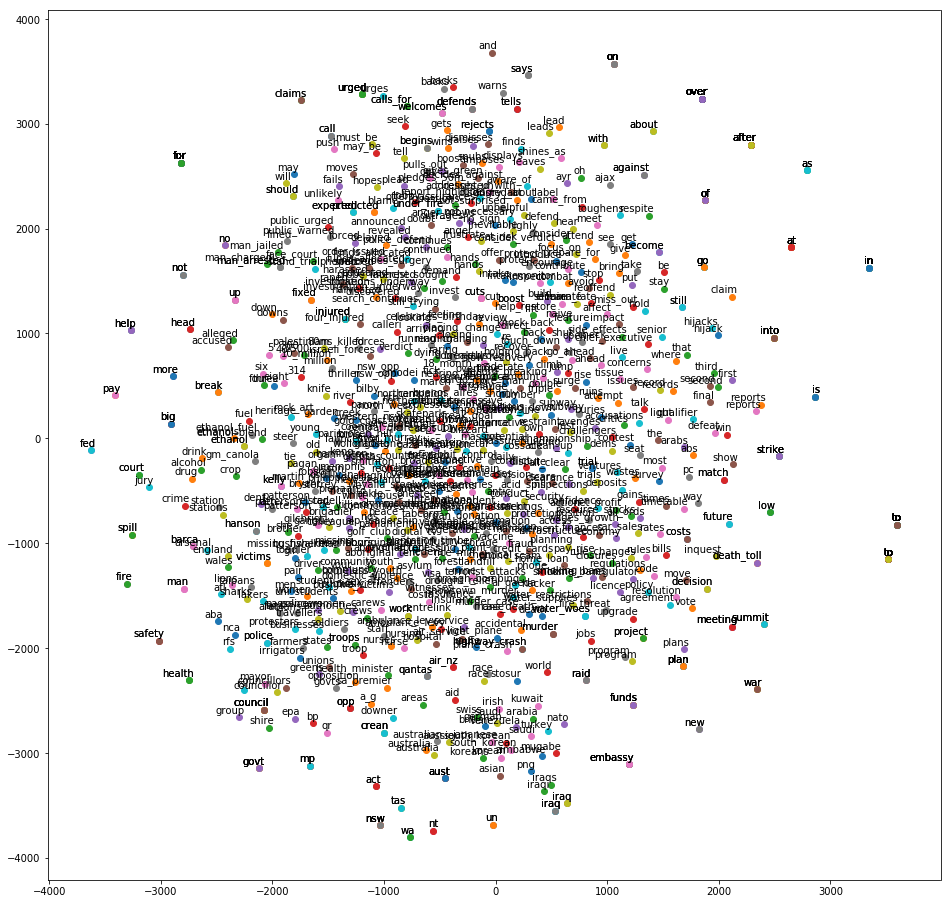

In [31]:
tsne_plot(loaded_model_ft, vocab)